In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns

df = pd.read_csv(r'D:\DataWarehouse and DataMining\DataMining\BaoCaoNhom\Example\K-means.csv') 
df

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


In [14]:
df = df.select_dtypes(['int64', 'float64'])
df = df.drop(['CustomerID'], axis=1)
df

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


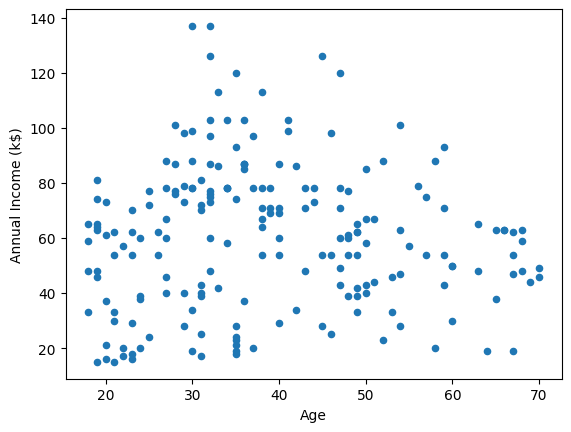

In [15]:
df.plot(kind ='scatter', x='Age', y='Annual Income (k$)')
plt.show()

In [19]:
km3 = KMeans(n_clusters = 3) 
km3 = km3.fit(df)
km3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [20]:
labels = km3.labels_ 
labels = pd.DataFrame(labels, columns=['cluster'])
df = pd.concat([df, labels], axis=1)

In [21]:
df.groupby('cluster').size()

cluster
0    58
1    91
2    51
dtype: int64

In [23]:
centroids = km3.cluster_centers_
feature_columns = df.columns[:-1]
centroids = pd.DataFrame(centroids, columns=feature_columns)
centroids

,Age,Annual Income (k$)
0,55.017241,51.293103
1,34.098901,82.912088
2,28.941176,31.215686


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

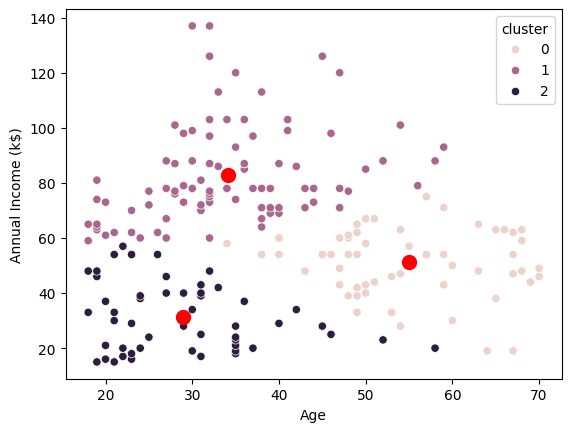

In [24]:
s1 = sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='cluster')
centroids.plot(ax=s1, kind ='scatter', x='Age', y='Annual Income (k$)', color='red', s=100)